# Proyecto Aurelion - IA Fundamentals - Spring 2 
## IBM - Guayerd 2025
## Análisis Exploratorio de Ventas 

Este notebook explora el flujo completo de análisis de datos comerciales mediante Python, con un modelo simulado que contiene 7 tablas relacionadas. El objetivo es consolidar los datos, analizarlos desde múltiples dimensiones y presentar resultados clave de forma visual.

In [29]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


## Paso 1: Carga de Datos

Importamos los 7 archivos de datos estructurados, proporcionados en formato `.xlsx`.

In [30]:
# Verificar o reemplazar las rutas de los archivos
df_clientes = pd.read_excel("../BD_Aurelion_expanded/clientes_expanded.xlsx")
df_productos = pd.read_excel("../BD_Aurelion_expanded/productos_expanded.xlsx")
df_ventas = pd.read_excel("../BD_Aurelion_expanded/ventas_expanded.xlsx")
df_detalle_ventas = pd.read_excel("../BD_Aurelion_expanded/detalle_ventas_expanded.xlsx")
df_sucursales = pd.read_excel("../BD_Aurelion_expanded/sucursales_expanded.xlsx")
df_vendedores = pd.read_excel("../BD_Aurelion_expanded/vendedores_expanded.xlsx")
df_medios_pago = pd.read_excel("../BD_Aurelion_expanded/medios_pago_expanded.xlsx")

print("Tablas cargadas correctamente.")

Tablas cargadas correctamente.


## Paso 2: Exploración y Validación Inicial

Revisamos estructura, nulos y tipos de datos para cada DataFrame.


In [31]:
datasets = {
    'clientes': df_clientes,
    'productos': df_productos,
    'ventas': df_ventas,
    'detalle_ventas': df_detalle_ventas,
    'sucursales': df_sucursales,
    'vendedores': df_vendedores,
    'medios_pago': df_medios_pago
}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(df.info())
    print(df.isnull().sum())


--- CLIENTES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_cliente           100 non-null    int64         
 1   nombre_cliente       100 non-null    object        
 2   email                100 non-null    object        
 3   ciudad               100 non-null    object        
 4   fecha_alta           100 non-null    datetime64[ns]
 5   genero               100 non-null    object        
 6   edad_rango           100 non-null    object        
 7   activo_como_cliente  100 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 5.7+ KB
None
id_cliente             0
nombre_cliente         0
email                  0
ciudad                 0
fecha_alta             0
genero                 0
edad_rango             0
activo_como_cliente    0
dtype: int64

--- PRODUCTO

## Paso 3: Limpieza y Conversión de Fechas

Convertimos campos de fecha y revisamos integridad.

In [32]:
df_clientes["fecha_alta"] = pd.to_datetime(df_clientes["fecha_alta"])
df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"])
df_vendedores["fecha_ingreso"] = pd.to_datetime(df_vendedores["fecha_ingreso"])
print("Fechas convertidas correctamente.")

Fechas convertidas correctamente.


## Paso 4: Unificación de Tablas

Unimos las tablas según claves foráneas para construir un DataFrame maestro `df_master`.

In [33]:
# 1. Unimos detalle con productos
dv_prod = df_detalle_ventas.merge(df_productos, on='id_producto', how='left')

# 2. Unimos con venta (encabezado)
ventas_detalle = dv_prod.merge(df_ventas, on='id_venta', how='left')

# 3. Unimos con clientes
completo_clientes = ventas_detalle.merge(df_clientes, on='id_cliente', how='left')

# 4. Unimos con sucursales
completo_sucursal = completo_clientes.merge(df_sucursales, on='id_sucursal', how='left')

# 5. Unimos con vendedores
completo_vendedor = completo_sucursal.merge(df_vendedores, on='id_vendedor', how='left')

# 6. Unimos con medios de pago
df_master = completo_vendedor.merge(df_medios_pago, on='id_medio_pago', how='left')

print("Unión de tablas realizada correctamente.")
df_master.head()
#df_master.shape

Unión de tablas realizada correctamente.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr


## Paso 5: Ingeniería de Características

Creamos columnas adicionales como año, mes, día de la semana, y monto final con descuentos.

In [34]:
df_master["año"] = df_master["fecha"].dt.year
df_master["mes"] = df_master["fecha"].dt.month
df_master["dia_nombre"] = df_master["fecha"].dt.day_name()
# Corregimos el cálculo del descuento_pct dividiendo por 100
df_master["descuento_pct"] = df_master["descuento_aplicado_pct"].fillna(0) / 100
df_master["monto_final"] = df_master["subtotal"] - (df_master["subtotal"] * df_master["descuento_pct"])

print("Columnas nuevas generadas.")
display(df_master[['fecha', 'año', 'mes', 'dia_nombre', 'descuento_aplicado_pct', 'descuento_pct', 'subtotal', 'monto_final']].head())

Columnas nuevas generadas.


,fecha,año,mes,dia_nombre,descuento_aplicado_pct,descuento_pct,subtotal,monto_final
0,2023-01-02,2023,1,Monday,0,0.0,29.02,29.02
1,2023-01-03,2023,1,Tuesday,0,0.0,119.70,119.70
2,2023-01-03,2023,1,Tuesday,0,0.0,23.45,23.45
3,2023-01-03,2023,1,Tuesday,0,0.0,81.22,81.22
4,2023-01-03,2023,1,Tuesday,0,0.0,20.69,20.69


## Paso 6: Análisis de Métricas Relevantes

A continuación realizamos distintos análisis para responder preguntas clave del negocio.

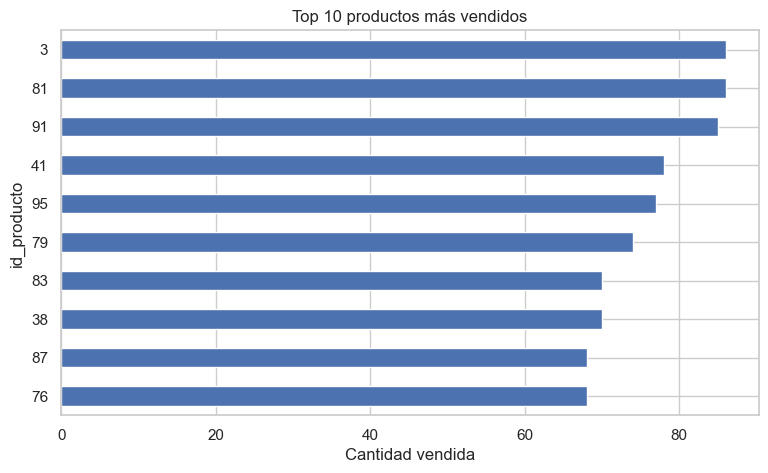

Productos más vendidos:
3 - Sprite 1.5L - 86
81 - Aceitunas Verdes 200g - 86
91 - Desodorante Ambiente Aerosol - 85
41 - Aceite de Girasol 900ml - 78
95 - Jabón de Tocador x3 - 77
79 - Hamburguesas Congeladas x4 - 74
83 - Queso Untable 190g - 70
38 - Harina Leudante 1kg - 70
87 - Detergente Ropa Color 800g - 68
76 - Pizza Congelada Muzzarella - 68


In [35]:
#Productos más vendidos
# Agrupamos por id_producto y sumamos las cantidades
top_productos = df_master.groupby("id_producto")["cantidad"].sum().sort_values(ascending=False).head(10)
# Generamos la gráfica
top_productos.plot(kind="barh", title="Top 10 productos más vendidos", figsize=(9,5))
plt.xlabel("Cantidad vendida")
plt.gca().invert_yaxis()
plt.show()

# Obtenemos los nombres de los productos
productos_dict = df_productos.set_index("id_producto")["nombre_producto"].to_dict()
# Generamos el print con id_producto, nombre_producto y cantidad
print("Productos más vendidos:")
for id_producto, cantidad in top_productos.items():
    nombre_producto = productos_dict.get(id_producto, "Desconocido")
    print(f"{id_producto} - {nombre_producto} - {cantidad}")

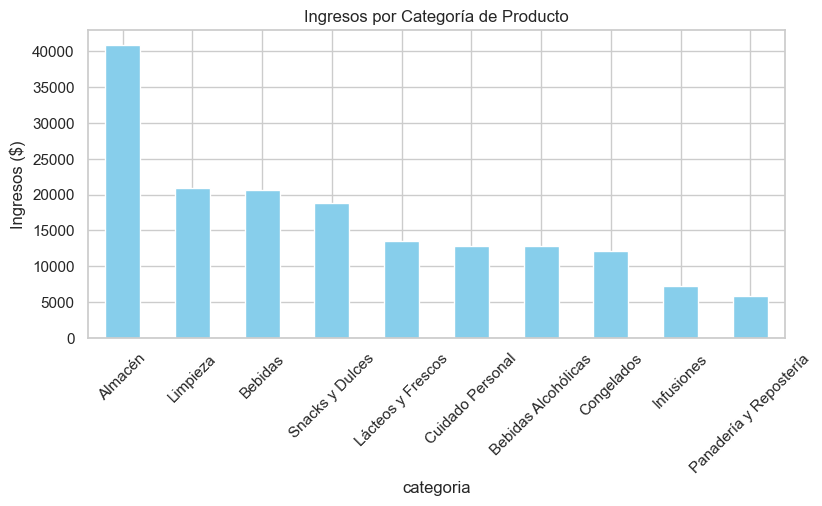

Ingresos por categoría:
Almacén - $40,878.35
Limpieza - $20,976.04
Bebidas - $20,594.92
Snacks y Dulces - $18,841.19
Lácteos y Frescos - $13,467.79
Cuidado Personal - $12,769.39
Bebidas Alcohólicas - $12,767.25
Congelados - $12,083.05
Infusiones - $7,260.74
Panadería y Repostería - $5,801.45


In [36]:
#Ingresos por categoría
ingresos_categoria = df_master.groupby("categoria")["monto_final"].sum().sort_values(ascending=False)
ingresos_categoria.plot(kind="bar", title="Ingresos por Categoría de Producto", figsize=(9,4), color='skyblue')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

print("Ingresos por categoría:")
for categoria, monto in ingresos_categoria.items():
    print(f"{categoria} - ${monto:,.2f}")

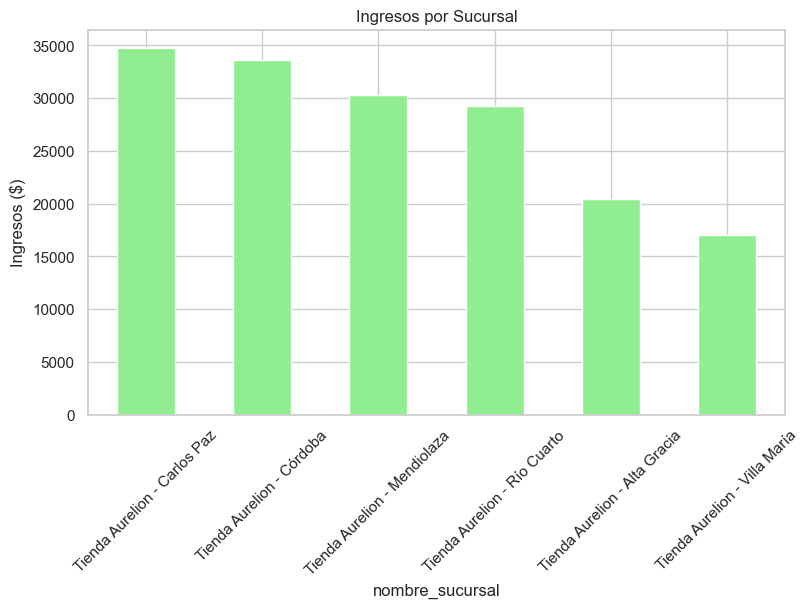

Ingresos por sucursal:
Tienda Aurelion - Carlos Paz - $34,760.12
Tienda Aurelion - Córdoba - $33,618.05
Tienda Aurelion - Mendiolaza - $30,282.02
Tienda Aurelion - Río Cuarto - $29,223.06
Tienda Aurelion - Alta Gracia - $20,491.82
Tienda Aurelion - Villa María - $17,065.11


In [37]:
#Ingresos por sucursal
ingresos_sucursal = df_master.groupby("nombre_sucursal")["monto_final"].sum().sort_values(ascending=False)
ingresos_sucursal.plot(kind="bar", title="Ingresos por Sucursal", figsize=(9,5), color='lightgreen')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

print("Ingresos por sucursal:")
for sucursal, monto in ingresos_sucursal.items():
    print(f"{sucursal} - ${monto:,.2f}")

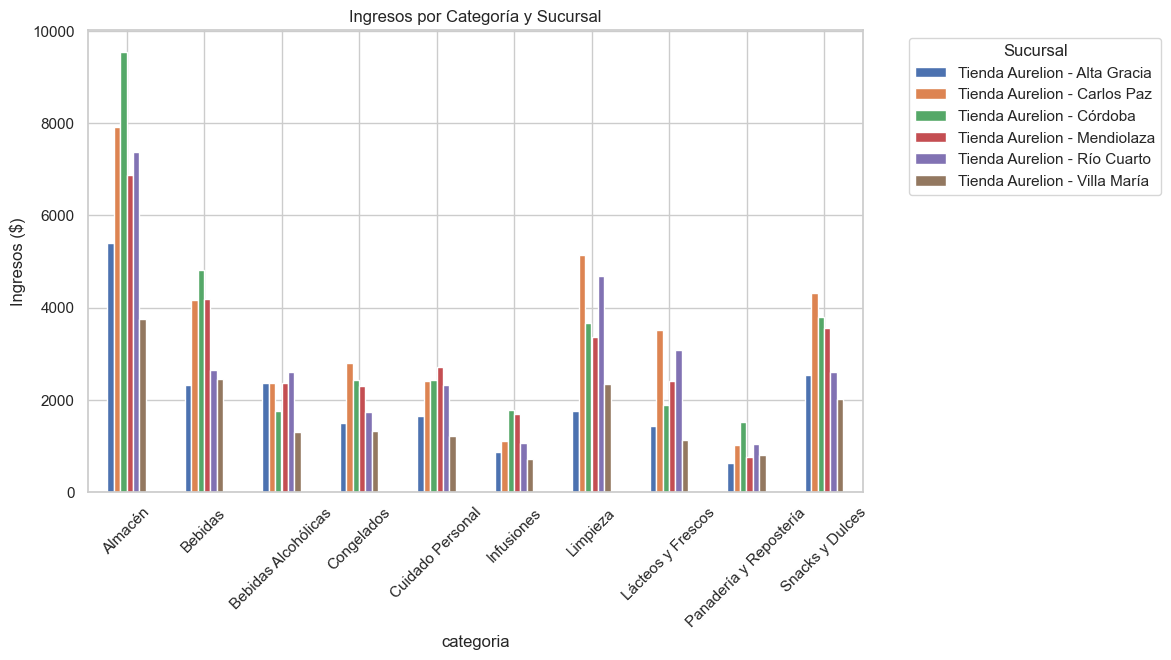

Ingresos por categoría y sucursal:
Almacén - Tienda Aurelion - Alta Gracia - $5,395.62
Almacén - Tienda Aurelion - Carlos Paz - $7,915.63
Almacén - Tienda Aurelion - Córdoba - $9,542.49
Almacén - Tienda Aurelion - Mendiolaza - $6,880.83
Almacén - Tienda Aurelion - Río Cuarto - $7,384.35
Almacén - Tienda Aurelion - Villa María - $3,759.42
Bebidas - Tienda Aurelion - Alta Gracia - $2,328.03
Bebidas - Tienda Aurelion - Carlos Paz - $4,166.65
Bebidas - Tienda Aurelion - Córdoba - $4,818.14
Bebidas - Tienda Aurelion - Mendiolaza - $4,182.36
Bebidas - Tienda Aurelion - Río Cuarto - $2,654.10
Bebidas - Tienda Aurelion - Villa María - $2,445.65
Bebidas Alcohólicas - Tienda Aurelion - Alta Gracia - $2,372.49
Bebidas Alcohólicas - Tienda Aurelion - Carlos Paz - $2,365.18
Bebidas Alcohólicas - Tienda Aurelion - Córdoba - $1,751.15
Bebidas Alcohólicas - Tienda Aurelion - Mendiolaza - $2,369.07
Bebidas Alcohólicas - Tienda Aurelion - Río Cuarto - $2,605.70
Bebidas Alcohólicas - Tienda Aurelion - Vi

In [38]:
#Ingresos por categoría y sucursal
ingresos_categoria_sucursal = df_master.groupby(["categoria", "nombre_sucursal"])["monto_final"].sum().unstack()
ingresos_categoria_sucursal.plot(kind="bar", title="Ingresos por Categoría y Sucursal", figsize=(10,6))
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.legend(title="Sucursal", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("Ingresos por categoría y sucursal:")
for categoria, sucursales in ingresos_categoria_sucursal.iterrows():
    for sucursal, monto in sucursales.items():
        print(f"{categoria} - {sucursal} - ${monto:,.2f}")

C:\Users\KEILY\AppData\Local\Temp\ipykernel_13584\3196318759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")


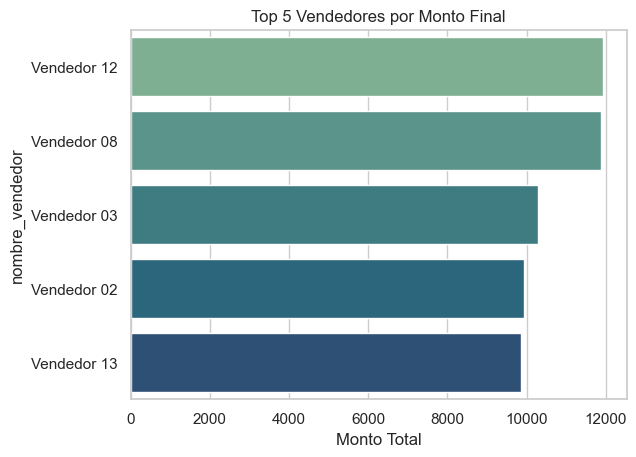

Top Vendedores:
Vendedor 12 - $11,929.14
Vendedor 08 - $11,891.23
Vendedor 03 - $10,281.52
Vendedor 02 - $9,942.16
Vendedor 13 - $9,859.00


In [39]:
#Top vendedores
top_vendedores = df_master.groupby("nombre_vendedor")["monto_final"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")
plt.title("Top 5 Vendedores por Monto Final")
plt.xlabel("Monto Total")
plt.show()

print("Top Vendedores:")
for vendedor, monto in top_vendedores.items():
    print(f"{vendedor} - ${monto:,.2f}")

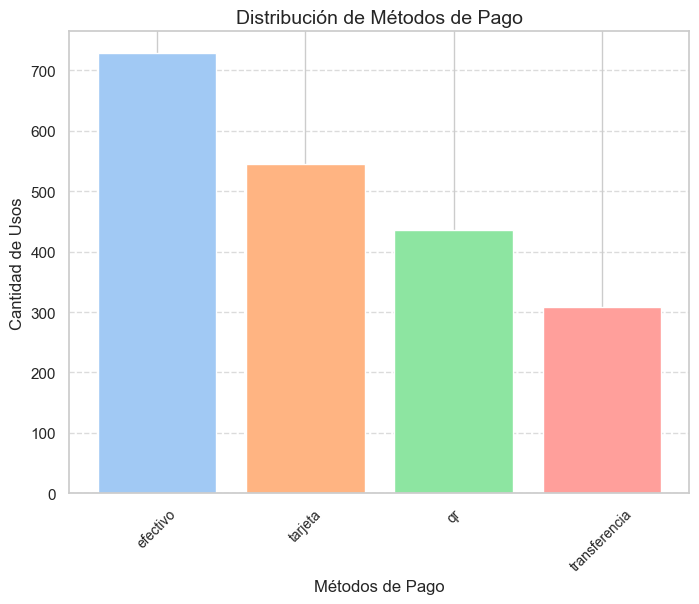

Distribución de métodos de pago:
efectivo - 728 usos
tarjeta - 545 usos
qr - 435 usos
transferencia - 308 usos


In [40]:
# Distribución de métodos de pago
metodos = df_master["nombre_medio_pago"].value_counts()
plt.figure(figsize=(8,6))
colors = sns.color_palette("pastel")
plt.bar(metodos.index, metodos.values, color=colors)
plt.title("Distribución de Métodos de Pago", fontsize=14)
plt.xlabel("Métodos de Pago", fontsize=12)
plt.ylabel("Cantidad de Usos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Distribución de métodos de pago:")
for metodo, cantidad in metodos.items():
    print(f"{metodo} - {cantidad} usos")

## Conclusión

Este análisis permitió consolidar múltiples fuentes de datos en un solo reporte integral. Se identificaron productos clave, vendedores destacados, diferencias entre sucursales y comportamiento de clientes frente a medios de pago.

Además, se logró:

- **Unificación de datos**: Integrar información de diversas tablas para obtener una vista completa del negocio.
- **Análisis detallado**: Identificar patrones de ventas, ingresos por categoría y sucursal, y métodos de pago preferidos.
- **Visualización efectiva**: Utilizar gráficos claros para comunicar hallazgos clave.

Estos resultados son fundamentales para tomar decisiones estratégicas basadas en datos y optimizar procesos internos. El siguiente paso será profundizar en el análisis predictivo y explorar nuevas oportunidades de crecimiento.

## Reflexiones y Próximos Pasos

El análisis realizado en este notebook nos brinda una perspectiva integral sobre las ventas y el comportamiento de los clientes. Sin embargo, siempre hay espacio para mejorar:

- **Profundizar en el análisis predictivo**: Utilizar modelos de machine learning para anticipar tendencias de ventas y comportamiento de clientes.
- **Segmentación avanzada**: Identificar grupos de clientes con características similares para personalizar estrategias de marketing.
- **Optimización de inventarios**: Analizar patrones de ventas para mejorar la gestión de stock y reducir costos.
- **Visualizaciones interactivas**: Implementar dashboards dinámicos que permitan explorar los datos de manera más intuitiva.

Estos pasos no solo fortalecerán la toma de decisiones, sino que también abrirán nuevas oportunidades para el crecimiento del negocio.